In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
'(()assddc[](sss)ss)))'.strip('())')

'assddc[](sss)ss'

For a line going trough the origin the slope is by

$$
a = \tan \alpha
$$

so  line going through the origin is 

$$
f(x) = \tan \alpha \cdot x.
$$


Lets now do a coodinate transformation $x \to x - x_0$ and $y \to y - y_0$.


$$
f(x)  = \tan \alpha \cdot (x - x_0) + y_0
$$


The inverse is 

\begin{align*}
y  &\equiv \tan \alpha \cdot (x - x_0) + y_0 \\
x &= \frac{(y - y_0)}{\tan \alpha} + x_0
\end{align*}

In [2]:
width, height = 200, 100

In [2]:
def line(x, a, b):
    return x*a + b

def angle2line(x, x0, y0, alpha0):
    return np.tan(np.deg2rad(alpha0))*(x-x0) + y0

def inv_angle2line(y, x0, y0, alpha0):
    return (y-y0)/np.tan(np.deg2rad(alpha0)) + x0
    

In [3]:
def newCollsionPoint(x, y, alpha):
    yleft = angle2line(0, x, y, alpha)
    yright = angle2line(width, x, y, alpha)
    xbottom = inv_angle2line(0, x, y, alpha)
    xtop = inv_angle2line(height, x, y, alpha)


    if alpha < 90: # collision top-right
        if xtop > width:
            return (width, yright, 180-alpha) # collision right vertical
        else: 
            return (xtop, height, 360-alpha) # collision top horizontal
        
    if alpha < 180: # collsion top left
        if yleft > height:
            return (xtop, height, 360-alpha) # collision top horizontal

        else:
            return (0, yleft, 180-alpha) # collision left vertical


    if alpha < 270: # collsion bottom left
        if xbottom < 0:
            return (0, yleft, 540-alpha) # collision left vertical
        else:
            return (xbottom, 0, 360-alpha) # collision bottom horizontal
        
    # collision bottom right
    if xbottom > width:
        return (width, yright, 540-alpha) # collision right vertical
    else:
        return (xbottom, 0, 360-alpha) # collision bottom horizontal
    
    


### check that all borders are detected

/tmp/ipykernel_13588/2297645684.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return (y-y0)/np.tan(np.deg2rad(alpha0)) + x0


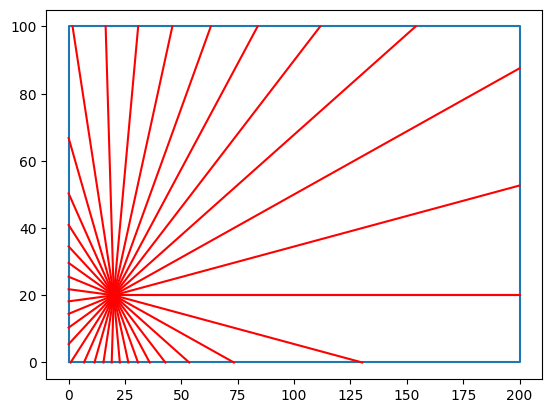

In [5]:
plt.plot([0, 0, width, width, 0], [0, height, height, 0, 0])


x0, y0 = 20, 20


for a in np.linspace(0, 360, 36):
    xx, yy, _ = newCollsionPoint(x0, y0, a)    
    xv = [x0, xx]
    yv = [y0, yy]
    plt.plot(xv, yv, 'r')



plt.show()

### check that reflections at borders happens correctly

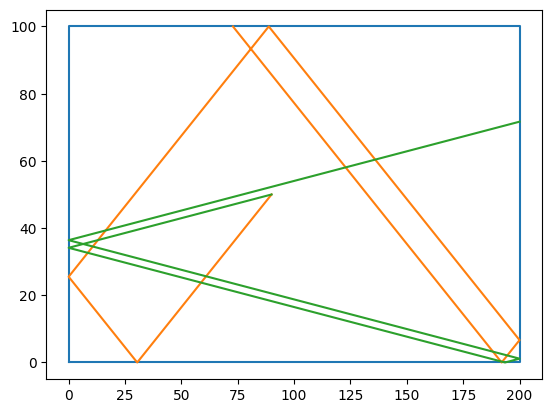

In [6]:
plt.plot([0, 0, width, width, 0], [0, height, height, 0, 0])


x0, y0, a0 = 90, 50, 220
x1, y1, a1 = 90, 50, 190
x0v, y0v, a0v = [x0], [y0], [a0]
x1v, y1v, a1v = [x1], [y1], [a1]

for i  in range(6):
    xx, yy, aa = newCollsionPoint(x0v[-1], y0v[-1], a0v[-1])
    x0v.append(xx)
    y0v.append(yy)
    a0v.append(aa)



for i  in range(5):
    xx, yy, aa = newCollsionPoint(x1v[-1], y1v[-1], a1v[-1])
    x1v.append(xx)
    y1v.append(yy)
    a1v.append(aa)

plt.plot(x0v, y0v)
plt.plot(x1v, y1v)

plt.show()

## now to the scattering

n different particles are created at the point of contact. the angles of these paths are normaly distributed around the (weighted maybe later?) mean of the incoming angles.

the lenghts of these paths can also be randomly chosen. 

In [4]:
def secondaryPaths(n, x0, y0, alpha1, alpha2, alpha_std=30, length_mean=50, length_std=10):
    alpha_mean = (alpha1 + alpha2)/2
    alpha_mean -= 180 #flip

    sec_alphas = alpha_mean + alpha_std*np.random.randn(n)
    sec_alphas[sec_alphas > 360] -= 360


    sec_lengths = length_mean + length_std*np.random.randn(n)

    sec_paths = []
    for s_a, s_l in zip(sec_alphas, sec_lengths):
        y1 = y0 + np.sin(np.deg2rad(s_a)) * s_l
        x1 = x0 + np.cos(np.deg2rad(s_a)) * s_l
        
        new_path = [[x0, x1], [y0, y1]]
        sec_paths.append(new_path)

    return sec_paths

[[90, 111.91229853736664], [50, 81.99445708362825]]
[[90, 160.43341127029606], [50, 42.88317425722849]]
[[90, 138.0204920676075], [50, 46.84853645071547]]
[[90, 134.1859940500299], [50, 60.29047197574235]]


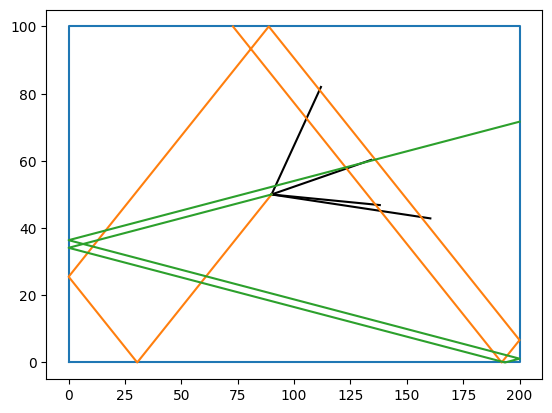

In [8]:
plt.plot([0, 0, width, width, 0], [0, height, height, 0, 0])



point_of_contact = 90, 50
alpha0, alpha1 = 220, 190

sec_paths = secondaryPaths(4, 90, 50, alpha0, alpha1)

for path in sec_paths:
    plt.plot(*path, 'k')
    print(path)



x0, y0, a0 = 90, 50, 220
x1, y1, a1 = 90, 50, 190
x0v, y0v, a0v = [x0], [y0], [a0]
x1v, y1v, a1v = [x1], [y1], [a1]

for i  in range(6):
    xx, yy, aa = newCollsionPoint(x0v[-1], y0v[-1], a0v[-1])
    x0v.append(xx)
    y0v.append(yy)
    a0v.append(aa)



for i  in range(5):
    xx, yy, aa = newCollsionPoint(x1v[-1], y1v[-1], a1v[-1])
    x1v.append(xx)
    y1v.append(yy)
    a1v.append(aa)

plt.plot(x0v, y0v)
plt.plot(x1v, y1v)

plt.show()

In [5]:
def calculatePathLength(coordinates):
    
    coords = np.array(coordinates)
    deltas = np.diff(coords, axis=1)
    
    distances = np.sqrt(np.sum(deltas**2, axis=0))
    
    return np.sum(distances)
    

### convert a path to svg instructions

In [6]:
def array2d_string(path_arr, secondary=False):

    x_arr = np.array(path_arr[0])[::-1] # inverse direction
    y_arr = np.array(path_arr[1])[::-1] # inverse direction

    if secondary:
        x_arr = x_arr[::-1]
        y_arr = y_arr[::-1]

    content = f'M{x_arr[0]},{y_arr[0]}'
    for px, py in zip(x_arr[1:], y_arr[1:]):
        content += f' L{px:.3f},{py:.3f}'
        
    return content


In [7]:
def line2svgPath(d, identifier, color='#ffffff', stroke_width=2, begin=0, dur=3, stroke_max=1000, fill='none', animate=True, reverse=True):
    line = f'<path id="{identifier}"\n  d="{d}"\n  stroke="{color}" stroke-width="{stroke_width}" fill="{fill}"'

    if animate:
        if reverse:
            line += f'\n  stroke-dasharray="{stroke_max}" stroke-dashoffset="{stroke_max}">    \n  \n  <animate \n    attributeName="stroke-dashoffset" \n    from="0" \n    to="{stroke_max}" \n    begin="{begin}s"\n    dur="{dur}s" \n    fill="freeze"/> \n'
        else:
            line += f'\n  stroke-dasharray="{stroke_max}" stroke-dashoffset="{stroke_max}">    \n  \n  <animate \n    attributeName="stroke-dashoffset" \n    from="{stroke_max}" \n    to="0" \n    begin="{begin}s"\n    dur="{dur}s" \n    fill="freeze"/> \n'
    else:
        line += f'> \n\n'
        
    line += f'</path>'

    return line


### wrap it into a nice function

In [10]:
class CollisionBuider:
    def __init__(self, width, height, point_of_contact, incoming_angles, relative_margin=0.05):
        self.width = width
        self.height = height 
        self.point_of_contact = point_of_contact
        self.incoming_angles = incoming_angles
        self.relative_margin = relative_margin

        self.primary_paths = []
        self.secondary_paths = []


    def calculatePrimaryPaths(self, n_bounces):
        if type(n_bounces) == int:
            n_bounces = [n_bounces]* len(self.incoming_angles)
        
        for n, alpha in zip(n_bounces, self.incoming_angles):
            x_path, y_path = [self.point_of_contact[0]], [self.point_of_contact[1]]
            
            for i in range(n):
                xi, yi, alpha = newCollsionPoint(x_path[-1], y_path[-1], alpha)
                x_path.append(xi)
                y_path.append(yi)
            self.primary_paths.append([x_path, y_path])


    def calculateSecondaryPaths(self, n_secondaries, alpha_std=30, length_mean=10, length_std=2):
        
        alpha_mean = np.mean(self.incoming_angles) #+ 180
        sec_alphas = alpha_mean + alpha_std*np.random.randn(n_secondaries)
        sec_alphas[sec_alphas > 360] -= 360

        sec_lengths = length_mean + length_std*np.random.randn(n_secondaries)

        for s_a, s_l in zip(sec_alphas, sec_lengths):
            x1 = self.point_of_contact[0] + np.cos(np.deg2rad(s_a)) * s_l
            y1 = self.point_of_contact[1] + np.sin(np.deg2rad(s_a)) * s_l
            
            new_path = [[x0, x1], [y0, y1]]
            self.secondary_paths.append(new_path)

    def plotResult(self):
        plt.figure(figsize=(10, self.height/self.width*10))

        plt.plot([0, self.width, self.width, 0, 0], [0, 0, self.height, self.height, 0], color='k')

        for primary_path in self.primary_paths:
            plt.plot(*primary_path, color='blue', linewidth=2)

        
        for secondary_path in self.secondary_paths:
            plt.plot(*secondary_path, color='orange', linewidth=1)

        plt.show()

        

    def to_svg(self, name, primary_color='#ffffff', secondary_color='#00c666',
                primary_stroke_width=2, secondary_stroke_width=1,
                  primary_duration=2, secondary_duration=1, primary_begin=0):
        
        secondary_begin= (primary_duration + primary_begin)

        #begin the string
        total_string = f'<svg xmlns="http://www.w3.org/2000/svg" width="1200" height="1200" viewBox="0 0 {self.width} {self.height}">\n\n'



        # background box
        d_box = f'M0,0 L{self.width},0 L{self.width},{self.height} L0,{self.height} Z'
        box_string = line2svgPath(d=d_box, identifier='box',
                                  color='#dc7474', stroke_width=0, animate=False, fill='#dc7474')
        total_string += box_string + '\n\n'   



        #possible rescaling to add a margin
        trans_width = self.width * self.relative_margin / 2
        trans_height = self.height * self.relative_margin / 2
        total_string += f'<g transform="scale({1-self.relative_margin}) translate({trans_width}, {trans_height})"> \n\n'



        # surrounding box
        d_box = f'M0,0 L{self.width},0 L{self.width},{self.height} L0,{self.height} Z'
        box_string = line2svgPath(d=d_box, identifier='box',
                                  color='#3c3c3c', stroke_width=0.5, animate=False, fill='#3c3c3c')
        total_string += box_string + '\n\n'   



        # loop over primary paths
        for primary_path in self.primary_paths:
            # this is the path as a string of Mx,y Lx,y ...
            d_string = array2d_string(primary_path)
            total_length = calculatePathLength(primary_path)
            
            path_string = line2svgPath(d=d_string, identifier='primary-path',
                                       color=primary_color, stroke_width=primary_stroke_width,
                                       begin=primary_begin, dur=primary_duration, stroke_max=total_length,
                                         animate=True, reverse=False)
            
            total_string += path_string + '\n\n\n'


        # loop over secondary paths
        for secondary_path in self.secondary_paths:
            # this is the path as a string of Mx,y Lx,y ...
            d_string = array2d_string(secondary_path, secondary=True)
            total_length = calculatePathLength(secondary_path)
            path_string = line2svgPath(d=d_string, identifier='secondary-path',
                                       color=secondary_color, stroke_width=secondary_stroke_width,
                                       begin=secondary_begin, dur=secondary_duration,stroke_max=total_length,
                                       animate=True, reverse=False)
            
            total_string += path_string + '\n\n'


        #end the string
        total_string += '</g>\n\n</svg>'

        # write
        with open(name, 'w') as file:
            file.write(total_string)
        
        print(f'Writen to {name}!')



    

In [11]:
builder = CollisionBuider(width=200, height=100, point_of_contact=(80, 40),
                          incoming_angles=[10, 272], relative_margin=0.1)
builder.calculatePrimaryPaths(4)
builder.calculateSecondaryPaths(20, length_mean=70, alpha_std=30, length_std=20)
builder.plotResult()
builder.to_svg('test.svg', primary_duration=2, secondary_duration=0.2, primary_stroke_width=1, 
               secondary_stroke_width=0.5)

NameError: name 'width' is not defined

In [14]:
builder.primary_paths[0]

[[90, 200, 26.43590901911449, 0, 200],
 [50, 69.39596787793116, 100, 95.33863598037586, 60.07323983868285]]

In [2]:
isinstance(3.2, int)

False

In [9]:
isinstance([3,4], (int, list))

True